In [8]:
# %pip install tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation

In [ ]:
IMG_SIZE=(128,128)
BATCH_SIZE=32


train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    shear_range=0.1,
    horizontal_flip=False,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [10]:

train_data = train_datagen.flow_from_directory(
    "E:\\AIMS\\AIMS\\dataset",
    target_size=IMG_SIZE,
    color_mode="grayscale",
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training",
    seed=42 
)

val_data = val_datagen.flow_from_directory(
    "E:\\AIMS\\AIMS\\dataset",
    target_size=IMG_SIZE,
    color_mode="grayscale",
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation",
    seed=42 
)

print(train_data.class_indices)

Found 1600 images belonging to 4 classes.
Found 400 images belonging to 4 classes.
{'down': 0, 'left': 1, 'right': 2, 'up': 3}


In [11]:
x_batch, y_batch = next(train_data)
print(x_batch.shape)
print(y_batch.shape)

(32, 128, 128, 1)
(32, 4)


In [12]:
model = Sequential([

    Conv2D(32, (3,3), padding='same', input_shape=(128,128,1)),
    Activation('relu'),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), padding='same'),
    Activation('relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), padding='same'),
    Activation('relu'),
    MaxPooling2D(2,2),

    Flatten(),

    Dense(64),
    Activation('relu'),
    Dropout(0.5),

    Dense(4, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 128, 128, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │     2,097,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,190,148 (8.35 MB)

 Trainable params: 2,190,148 (8.35 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=25
)

Epoch 1/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 16s 219ms/step - accuracy: 0.3225 - loss: 1.3759 - val_accuracy: 0.6675 - val_loss: 1.0528
Epoch 2/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 215ms/step - accuracy: 0.6062 - loss: 0.9520 - val_accuracy: 0.8550 - val_loss: 0.5870
Epoch 3/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 216ms/step - accuracy: 0.6869 - loss: 0.7425 - val_accuracy: 0.8425 - val_loss: 0.4720
Epoch 4/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 207ms/step - accuracy: 0.7325 - loss: 0.6460 - val_accuracy: 0.8900 - val_loss: 0.4483
Epoch 5/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 220ms/step - accuracy: 0.7663 - loss: 0.5626 - val_accuracy: 0.9475 - val_loss: 0.3157
Epoch 6/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 220ms/step - accuracy: 0.7862 - loss: 0.5292 - val_accuracy: 0.9025 - val_loss: 0.3510
Epoch 7/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 210ms/step - accuracy: 0.8356 - loss: 0.4361 - val_accuracy: 0.9425 - val_loss: 0.2324
Epoch 8/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 217ms/step - accuracy: 0.8625 - loss: 0.3550 - val_accu

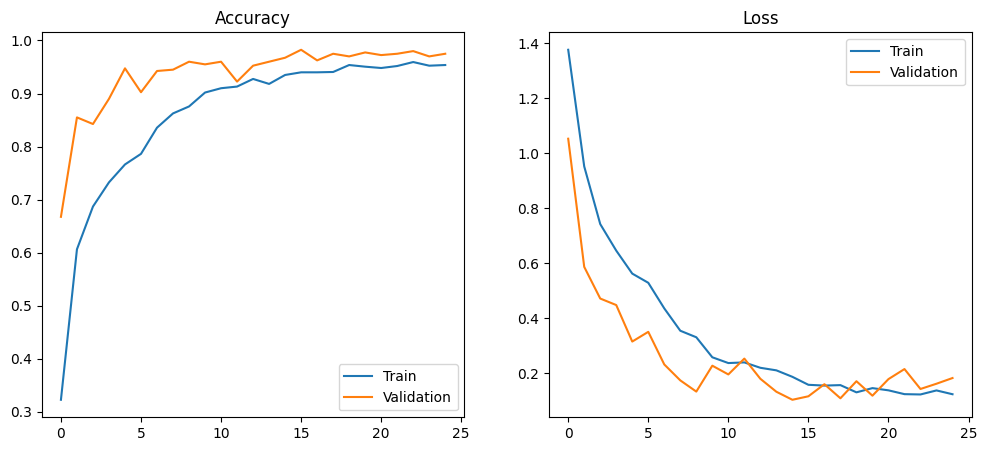

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.legend(["Train", "Validation"])

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Loss")
plt.legend(["Train", "Validation"])

plt.show()

In [15]:
model.save("thumb_direction_model.h5")

In [16]:
# %pip install opencv-python

In [18]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

model = load_model("thumb_direction_model.h5")

labels = list(train_data.class_indices.keys())

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(gray, (128,128))
    img = img / 255.0
    img = np.reshape(img, (1,128,128,1))

    prediction = model.predict(img, verbose=0)
    direction = labels[np.argmax(prediction)]

    cv2.putText(frame, direction.upper(), (30,50),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)

    cv2.imshow("CNN Prediction", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()